## S&P 500 Energy Sector 
### OPIM 5641 BDM Project 2 
###Team 3

Jiajun Zhou

Junchi Ma

Lauren Ein

Vedant Dadhich


	




##  Outline for notebooks


*   Notebook 1 ‘Group3_EDA.ipynb’→ Data Prep and EDA Section
*   Notebook 2 ‘Group3_Model.ipynb’ → Modeling Section
*   Notebook 3 ‘Group3_Analysis&Conclution.ipynb’  → Analysis & Conclusion Section







# Data Prep and EDA

## Set up the environment and upload the dataset.
The S&P 500 Index also known as the Standard & Poor's 500 Index is a market cap weighted index of the largest 500 publicly traded companies in the US. It uses a float-weighted index, which adjusts the company’s market cap based on the number of shares available for public trading. The S&P 500 is broken up into  11 sectors and 24 industry groups. The order of the 11 sectors based on size is as follows: Information Technology, Health Care, Financials, Consumer Discretionary, Communication Services, Industrials, Consumer Staples, Energy, Utilities, Real Estate, and Materials.

Group 3 focused on the Energy Sector which consists of all companies that play a part in the oil, gas, and consumable fuels business. This includes companies that  find, drill, and extract the commodity as well as the companies that refine and/or manufacture the equipment for the refinement process. Companies such as Exxon Mobil and Chevron extract and refine gas, while companies like Kinder Morgan transport fuel to gas stations.

The dataset was  copied from all sheets Main View, Technical, Fundamental, and Performance, https://www.barchart.com/stocks/indices/sp-sector/energies?viewName=main and it inclued all teachinical information of all stocks in energy sector. The data grabbed on Oct 29, 2020.



In [ ]:
# Read data from Excel file
from google.colab import files

# Command to upload file
uploaded = files.upload()

Saving S&P Sectors - Energies.csv to S&P Sectors - Energies (14).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy 
import io
import locale



locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Transform excel file in a pandas dataframe
df = pd.read_csv('S&P Sectors - Energies.csv') 
df.head()


,Symbol,Name,Last,Change,%Chg,Open,High,Low,Volume,Time,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,"Market Cap, $K",P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,APA,Apache Corp,8.19,0.40,0.0513,7.67,8.22,7.45,"12,388,793",16:00 ET,100% Sell,35.91%,70.51%,"12,698,882",3.80,33.77,-51.79,-68.03%,-14.26%,-40.07%,-62.90%,"2,940,406",0.00,-1.08,"-3,553.00 M",4.73,0.10,1.28%
1,BKR,Baker Hughes A Ge CO Cl A,14.35,0.65,0.0474,13.50,14.36,13.36,"9,458,171",10/29/2020,56% Sell,52.33%,36.76%,"7,012,035",9.12,25.99,-31.02,-44.54%,0.0826,-10.09%,-35.09%,"14,162,416",38.30,0.37,128.00 M,1.67,0.72,5.26%
2,COG,Cabot Oil & Gas Corp,18.39,0.22,0.0121,17.85,18.43,17.65,"5,243,374",10/29/2020,24% Buy,46.89%,38.47%,"4,590,684",13.06,22.67,1.61,0.0569,0.0431,-0.43%,-2.95%,"7,242,198",27.27,0.70,681.07 M,0.22,0.40,2.20%
3,COP,Conocophillips,29.16,0.37,0.0129,28.12,29.18,27.53,"15,539,958",10/29/2020,100% Sell,36.13%,52.78%,"11,242,119",20.84,67.13,-45.21,-55.19%,-10.23%,-27.04%,-48.96%,"30,875,262",27.26,1.11,"7,189.00 M",1.68,1.72,5.97%
4,CVX,Chevron Corp,68.80,1.92,0.0287,66.13,69.14,65.16,"12,251,561",10/29/2020,100% Sell,38.23%,30.33%,"10,869,022",51.60,122.94,-35.82,-42.90%,-4.30%,-23.60%,-41.75%,"124,886,560",25.00,2.78,"2,924.00 M",1.26,5.16,7.72%


## Make five charts from the dataset

### Chart 1: Net Income vs Symbol 
The calculation for Net Income is revenues minus expenses, interest, and taxes. The metric shows the income after taxes and deduction, so an investor can see an individual company’s gross income without hidden accounting methods that could inflate revenues. 

In [ ]:
if not df['Net Income(a)'].dtype == "float64":
  df['Net Income(a)'] = df['Net Income(a)'].apply(lambda x: locale.atof(x[:-1]))
 

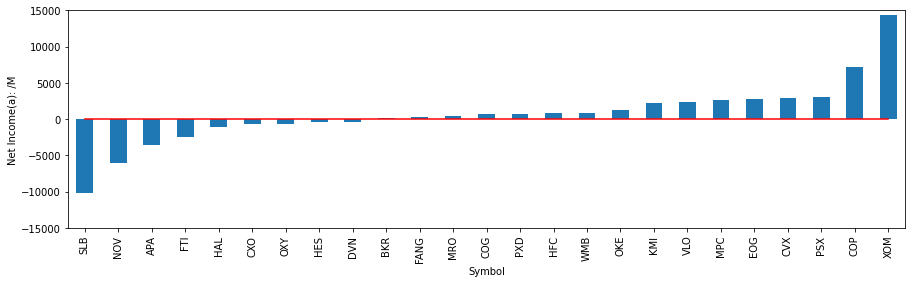

In [ ]:
df = df.sort_values(by='Net Income(a)')
df['Net Income(a)'].plot(kind ='bar' ,ylim= (-15000,15000))

lineAr = [0 for i in df['Symbol']]
plt.plot(lineAr,color='red')

x_pos = [i for i, _ in enumerate(df['Symbol'])]

plt.xticks(x_pos, df['Symbol'])
plt.xlabel("Symbol") 
plt.ylabel('Net Income(a): /M') 
plt.rcParams["figure.figsize"] = (10,4)



plt.show() 

* Trend 1- 9 out 25 (36%) of the companies had negative Net Income during at this time, indicating that the costs to run the company are exceding the revenue generated.
* Trend 2- The 16 companies that do have postive Net Income is not evenly distributed. XOM the company with the highest NI represents 33% of the total postive Net Income.
* From this chart group 3 will exclude the following companies because they have negative Net Income: SLB, NOV, APA, FTI, HAL, CXO, OXY, HES, DVN

### Chart 2: Price to Earnings (P/E Ratio) vs Symbol
The P/E Ratio measures the share price to to EPS (earnings per share) or a company's earnings multiple. A high ratio could either mean that a company is over valued or expecting high growth in the future. 

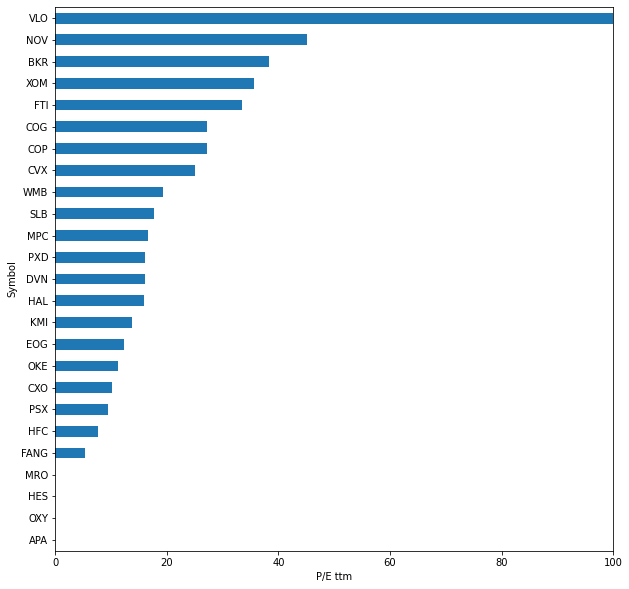

In [ ]:
df =df.sort_values(by='P/E ttm')
df['P/E ttm'].plot.barh(xlim=(0,100))

y_pos = [i for i, _ in enumerate(df['Symbol'])]

plt.yticks(y_pos, df['Symbol'])
plt.xlabel("P/E ttm") 
plt.ylabel('Symbol') 
plt.rcParams["figure.figsize"] = (10,10)

plt.show() 

* Trend 1- 4 out 25 companies have a P/E ration of 0 because that means they have no earnings or are losing money since there is zero in the denominator of the ratio.
* Trend 2- The energy sector's industry average is 49.6, if the company VLO is excluded from the average it is reduced to 20.2, suggesting that the VLO company ratio is so high it is SKU the industry average. As mentioned having a high ratio could suggest that potential investors will think the company is over valued.
* From this chart group 3 will exclude the following companies because they have zero P/E ratio: MRO, OXY, APA, HES

### Chart 3: 1M, 3M, and 52 WK Price % Change trend vs Symobl
% Price change is given the ending price on October 29, when the data pull vs the price 1 month prior, 3 month prior, and 52 weeks prior, how much has the stocks' price changed in value over the given period. The three difference time periods are show on one graph to disply trends for each stock.

In [ ]:
df = pd.read_csv('S&P Sectors - Energies.csv') 
if not df['1M %Chg'].dtype == "float64":
  df['1M %Chg'] = df['1M %Chg'].apply(lambda x:  float(x.strip('%'))/100 if x[-1:] == "%" else float(x))
if not df['3M %Chg'].dtype == "float64":
  df['3M %Chg'] = df['3M %Chg'].apply(lambda x:  float(x.strip('%'))/100 if x[-1:] == "%" else float(x))
if not df['52W %Chg'].dtype == "float64":
  df['52W %Chg'] = df['52W %Chg'].apply(lambda x:  float(x.strip('%'))/100 if x[-1:] == "%" else float(x))

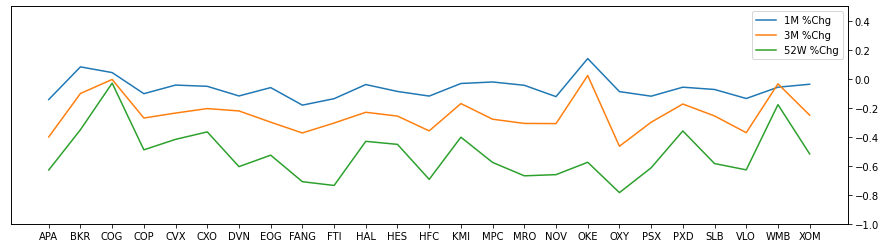

In [ ]:

df['1M %Chg'].plot(secondary_y=True)
df['3M %Chg'].plot(secondary_y=True)
df['52W %Chg'].plot(secondary_y=True)
x_pos = [i for i, _ in enumerate(df['Symbol'])]
plt.ylim(top=0.5)
plt.ylim(bottom = -1)
plt.rcParams["figure.figsize"] = (15,4)
plt.xticks(x_pos, df['Symbol'])
plt.legend()
plt.show() 

* Trend 1- The graphed data points of the line graph are almost entirely negative percentage price changes, this shows as an sector that all company's stock have devalued over time. 
* Trend 2- Looking at the percentage price change over three different time periods, shows that looking over a longer time period like 52 wks all companies have seen a more significant drop in price than they have seen in the last month.
* Trend 3- Stocks that have data points close together demonstrate that they have seen more consistent decrease in cost over these time periods and there was no "big" drop in price at one given time.

* From this chart group 3 will consider including the following companies in our portfolio 
 *  Indicates of consistent change: PSX, EOG, WMB
 *  Indicates of minimal price change: KMI, DVN, COP, BKR, VLO



### Chart 4: Dividend and Dividend Yield vs Symbol
Dividends are shown as a dollar amount per share that is paid out to an investor. The rate may be either fixed or adjustable, depending on the company

Dividends Yield represents the ratio of a company's current annual dividend compared to its current share price and shown as a percentrage. In gernal the expectation is for the dividend to remains the same even if the share price drops, then you would expect the dividend yield to rise. 

In [ ]:
df = pd.read_csv('S&P Sectors - Energies.csv') 
if not df['Div Yield'].dtype == "float64": 
  df['Div Yield'] = df['Div Yield'].apply(lambda x : float(x.strip('%'))/100)




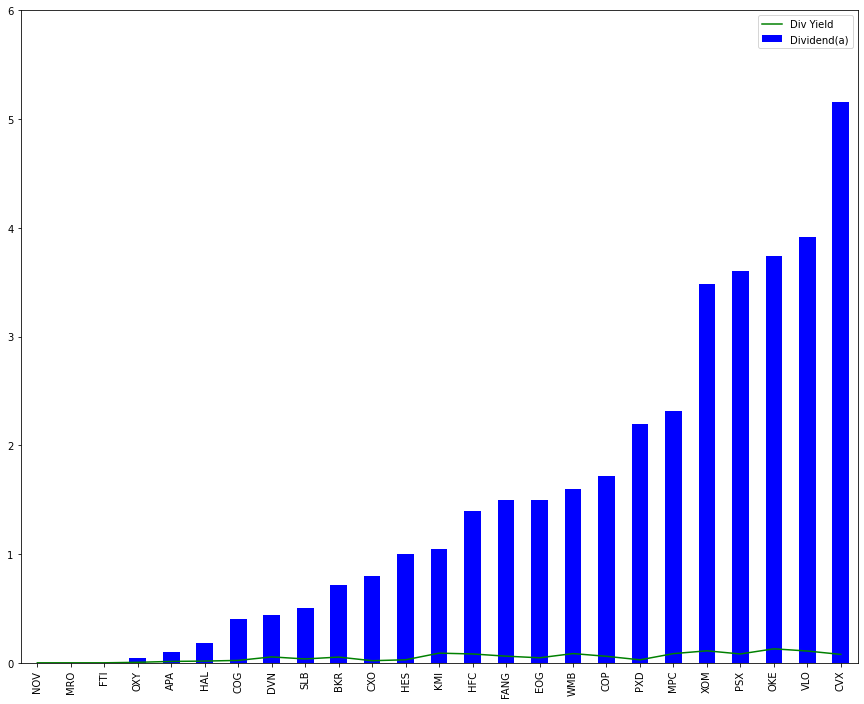

In [ ]:
df = df.sort_values(by='Dividend(a)')
df['Dividend(a)'].plot(kind='bar',color = "blue", label = 'Dividend(a)')
dy = numpy.array(df['Div Yield'])
plt.plot(dy, color ='green', label ='Div Yield')


plt.ylim(0,6)
x_pos = [i for i, _ in enumerate(df['Symbol'])]

labels = ['Div Yield', 'Dividend(a)']


plt.xticks(x_pos, df['Symbol'])
plt.rcParams["figure.figsize"] = (15,12)

plt.legend(labels)

plt.show() 

* Trend 1- There were 3 companies that did not payout a dividend. From the graph we cannot tell if they historically have paid out a divident but compared to the other companies that makes these stocks less attractive if they  are not offering a dividend. 
* Trend 2- Ther were an additional 6 companies where the Dividend Yield was below 3%, which shows that although they paid out a divident it is a relatively small amount compared to the sector average 5.1%

* From this chart group will exclude the following companies in our portfolio 
 *  Companies no dividends: MRO, OXY, APA
 *  Low Div Yield: HES, FANG, HFC, KMI, HAL, COP


### Chart 5: Pie Graph of Market Cap

Market capitalization also known as Market Cap is the total dollar value of all outstanding shares of a company. This can be used as a measurement co compare company's size versus each other to understand their aggregate market value as a comparison.

In [ ]:
if not df['Market Cap, $K'].dtype == "float64": 
  df['Market Cap, $K'] = df['Market Cap, $K'].apply(lambda x:  locale.atof(x[:-1]))

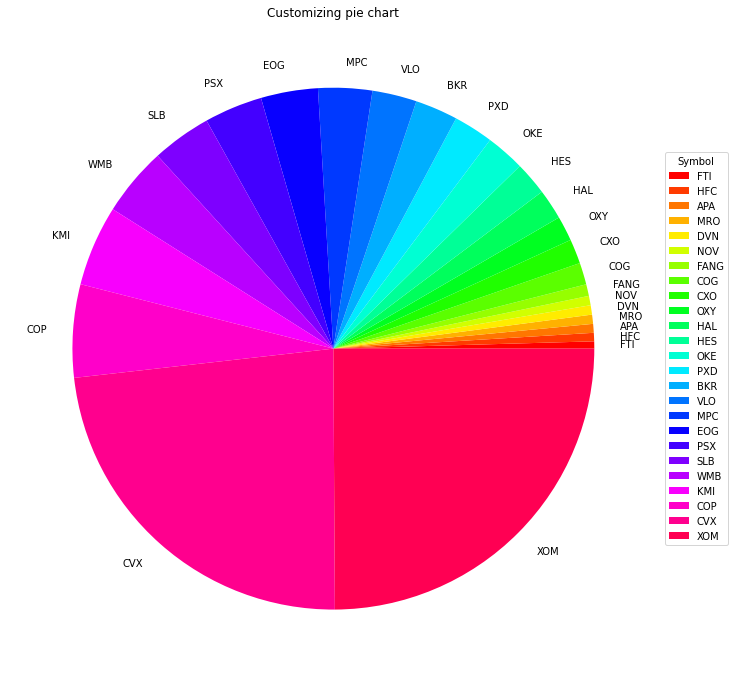

<Figure size 1440x504 with 0 Axes>

In [ ]:
# Creating dataset 
df = df.sort_values(by='Market Cap, $K')
Symbol= df['Symbol'] 
  
data = df['Market Cap, $K'] 
  


# Creating plot 
fig1 ,ax = plt.subplots()
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(data))
                             for i in range(len(data))])
 
wedges , autotext = ax.pie(data,labels = Symbol)


fig1 = plt.figure(figsize =(20, 7))  
# Adding legend 
ax.legend(wedges, Symbol, 
          title ="Symbol", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  

ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 

Chart 5 is a pie graph to show each companies % of the Market Cap of the S&P 500 of 535 billion dollars, chose to exclude the bottom 10 companies as in total they only represent 44 billion dollars or 8% of the total space. Want to focus our portfolio on the bigger companies.
* Trend 1- The Energy sector is 535 billion, the 10 smallest comapnies only have a market cap of 44 billion dolars which is only 8 percent of the sector
* Trend 2- The top 2 largest companies XOM and CVX represent almost than half of the market CAP (48.2 percent or 258 billion dollars)

* From this chart group 3 will Exclude 10 smallest companies under $10 billion from our portfolio as there is more opportunity ROR with larger companies: FTI, HFC, APA, MRO, DVN, NOV, FANG, COG, CXO, OXY

## Stock Selection

After analyzing the 5 charts in the S&PE 500 Energy sector, Group 3 chooses the following 10 Companies  to focus portfolio on : 
* Baker Hughes A Ge CO Cl A(BKR)- An Energy technology company operating in 120 countries. 
* Chevron Corp(CVX)- It’s only human to want a better life, and we need reliable, affordable and ever-cleaner energy to get there. To provide this energy, we believe in the power of human ingenuity to lead us to a brighter future.
* Eog Resources(EOG)- is one of the largest crude oil and natural gas exploration and production companies in the United States with proved reserves in the US, Trinidad and China.
* Marathon Petroleum Corp(MPC)-  is an American petroleum refining, marketing, and transportation company 
* Oneok Inc(OKE)- Leading midstream service provider with one of the nation’s premier natural gas liquids systems, connecting supply in the Rocky Mountain, Mid-Continent with key market centers and an extensive network of natural gas gathering, processing, storage and transportation assets.
* Phillips 66(PSX)- over 140 years of experience, a diversified energy manufacturing and logistics company with unique businesses in Refining, Midstream, Chemicals and Marketing and Specialties.
* Pioneer Natural Resources Company(PXD)-Top-tier, independent exploration and production company. All proved reserves, production and resource potential in low-risk, predictable basins in the United States
* Valero Energy Corp(VLO)- is international manufacturer and marketer of transportation fuels, other petrochemical products, and power.
* Williams Companies(WMB)- is an American energy company based in Tulsa, Oklahoma. Its core business is natural gas processing and transportation, with additional petroleum and electricity generation assets.
* Exxon Mobil Corp(XOM)-  is an American multinational oil and gas corporation headquartered. It is the largest direct descendant of John D. Rockefeller's Standard Oil, formed in 1999 by the merger of Exxon and Mobil
